# Theis wells introduction

Theis considered the transient flow due to a well with a constant extraction since $t=0$ placed in a uniform confined aquifer of infinite extent.

The solution may be opbtained by straighforward Lapace transformation and looking up de result from the Laplace inversions table. It reads

$$ s(r, t) = \frac Q {4 \pi kD} W(u),\,\,\,\, u = \frac {r^2 S} {4 kD t}$$

where W(..) is the so-called Theis well function, which is actually equal to the mathematical exponential integral

$$ W(z) = \mathtt{exp1}(z) = \intop _z ^\infty \frac {e^{-y}} {y} dy $$

The exponential integral lives in scipy special as the function $\mathtt{exp1}(z)$

After importing this function from the module scipy.special we can use `exp1(u)`

In [1]:
from scipy.special import exp1
import numpy as np
import matplotlib.pyplot as plt

How does the drawdown behave for diffent distances from the well?

For this assume a real situation.

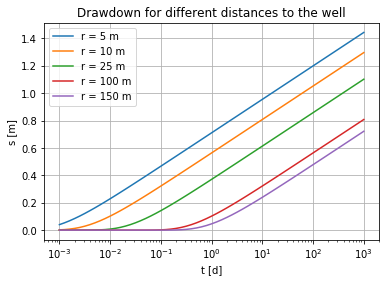

In [4]:
kD = 900 # m2/d
S = 0.1 # [-]
Q = 1200 # m3/d

plt.title('Drawdown for different distances to the well')
plt.xlabel('t [d]')
plt.ylabel('s [m]')
plt.xscale('log')
plt.grid()


t = np.logspace(-3, 3, 61) # d
distances = [5, 10, 25, 100, 150] # m
for r in distances:
    u = r**2 * S / (4 * kD * t)
    s = Q/(4 * np.pi * kD) * exp1(u)
    plt.plot(t, s, label='r = {:.0f} m'.format(r))
plt.legend()
plt.show()

## Approxmation of the Theis well function

$$ W(u) \approx  = -\gamma - \ln u + u - \frac {u^2} {3\times 2!}
+ \frac {u^3} {3\times 3!} - \frac {u^4} {4 \times 4!} + ... $$

with $\gamma$ Euler's constant

$$ \gamma = 0.577216... $$

It's straigt-forward to implement this power series. But one also see that for very small values of $u$, the series may be approximated by

$$ \mathtt{W}(u) \approx -\gamma - \ln u $$

This may be worked out as follows:

$$ W(u) \approx - \ln \left( e^\gamma \right) - \ln \left( \frac {r^2 S} {4 kD t} \right) $$

$$ W(u) \approx + \ln \left( \frac 1 {e^\gamma} \right) + \ln \left( \frac {4 kD t} {r^2 S }\right)$$

$$ W(u) \approx \ln \left(  \frac {2.25 kD t} {r^2 S}  \right) $$

This is a simple logarithm, valid for small enough values or $u$, hence, for large enough values of time $t$. (Or for small enough values of $r$ in case a fixed time is chosen.)

Let's compare the Theis well function with this approxmation for different values or distance $r$

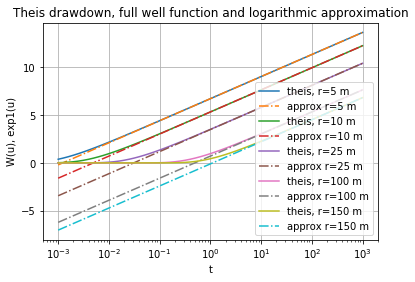

In [16]:



plt.title('Theis drawdown, full well function and logarithmic approximation')
plt.xlabel('t')
plt.ylabel('W(u), exp1(u)')
plt.xscale('log')
plt.yscale('linear')
plt.grid()

for r in distances:
    plt.plot(t, exp1(r**2 * S /(4 * kD * t)), label='theis, r={:.0f} m'.format(r))
    plt.plot(t, np.log(2.25 * kD * t/(r**2 * S)), '-.', label='approx r={:.0f} m'.format(r))
plt.legend()
plt.show()

The graph shows that the proximation is indeed only valid after some time, but after that it falls on the true drawdown graph.

## Radius of influence

The distance at which the drawdown starts to deviate from zero increases with time as can be seen on the previous graph. That distance is called the `radius of influence`. It can be set equal to the distance at which the straight drawdown approxmation intersects with the horizontal axis, the line of zero drawdown. If we do that, we can derive it immediately from our approximation of the Theis drawdown curve by setting it to zero, i.e. by setting the argument under the logarithm equal to 1.

$$ \frac {2.25 kD t} {r^2 S} = 1 $$

And so

$$ r = \sqrt {\frac {2.25 kD t}  S}$$

From which it follows that this radius is proportional to the root of $kD$ and $t$ and inversily proportional to the root of $S$. In fact, one may say that the area of influence is directly proportional to $kD t / S$

This radius of influence is a very practial tool to estimated the influence that a transient well has on its enviroment.

## Dradown versus log $r$ is linear for small enough $r$

It should also be clear that the drawdown increases with $1/r$ on logarithmic scale for small enough $r$.

We wil show this for different times in this section.

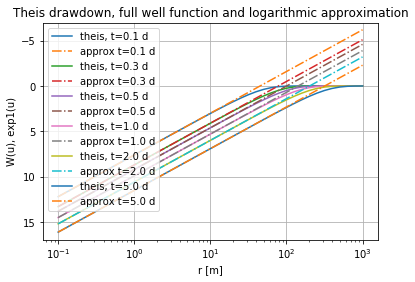

In [20]:
r = np.logspace(-1, 3, 41)
times = [0.1, 0.3, 0.5, 1, 2, 5]

plt.title('Theis drawdown, full well function and logarithmic approximation')
plt.xlabel('r [m]')
plt.ylabel('W(u), exp1(u)')
plt.xscale('log')
plt.yscale('linear')
plt.ylim((17, -7))
plt.grid()

for t in times:
    plt.plot(r, exp1(r**2 * S /(4 * kD * t)), label='theis, t={:.1f} d'.format(t))
    plt.plot(r, np.log(2.25 * kD * t/(r**2 * S)), '-.', label='approx t={:.1f} d'.format(t))
plt.legend()
plt.show()

In the graph above, the y-axis was turned upside down by using `plt.ylim((min, max))` so that the drawdown is downward on the graph, which is more inuitive. Instead of a raidus of influence, one may now define and observe a time of influence

$$ t = \sqrt{\frac {r^2 S} {2.25 kD} } $$

One observes that with time the drawdown (straight lines) moves parallel to the right on this logarithmic distance axis.